<img src="pp.png" align ="center" width="900" height="600" /><br>
<h1 align ="center" style = "color:blue"> implémentaion régression linéaire  </h1>

In [56]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
import time

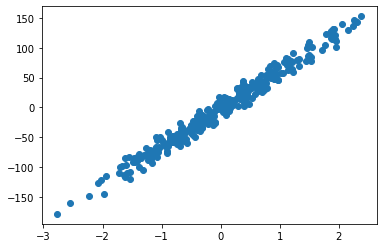

In [18]:
np.random.seed(0) #  le meme dataset
x, y = make_regression(n_samples=300, n_features=1, noise=10)

plt.scatter(x, y) # afficher les résultats.
plt.show()

In [19]:
print(x.shape)
print(y.shape)

# redimensionner y
y = y.reshape(y.shape[0], 1)

print(y.shape)

(300, 1)
(300,)
(300, 1)


In [20]:
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)

(300, 2)


In [21]:
np.random.seed(0) #  le meme vecteur theta aléatoire
theta = np.random.randn(2, 1)
theta

array([[1.76405235],
       [0.40015721]])

# 2. Création de Modele 

On implémente un modele $F = X.\theta$,


In [22]:
def model(X, theta):
    return X.dot(theta)

In [23]:
y.shape

(300, 1)

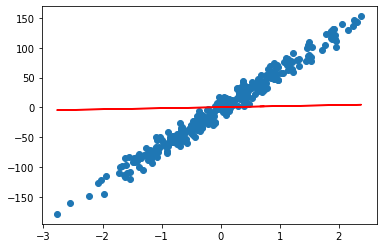

In [24]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

# 3. Fonction Cout ou Pert MSE :  Erreur Quadratique moyenne
On mesure les erreurs du modele sur le Dataset X, y  

$ J(\theta) = \frac{1}{2m} \sum (X.\theta - y)^2 $

In [25]:
def fonction_cout(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [26]:
fonction_cout(X, y, theta)

1953.7946842508602

# 4. Gradients 

$\frac{\partial J(\theta) }{\partial \theta} = \frac{1}{m} X^T.(X.\theta - y)$

In [27]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

# 5. Descente de Gradient / algorithme d'apprentissage
$\theta = \theta - \alpha \frac{\partial J(\theta) }{\partial \theta}$

In [28]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    loss_history =[] # pour enregistrer l'évolution de l'erreur du modele
    theta_history=[]
    for i in range(n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        theta_history.append(theta)
        loss_history.append(fonction_cout(X, y, theta)) # on enregistre la valeur du Cout au tour i 
        
    return theta, loss_history,theta_history

# 6. Phase d'entrainement


In [29]:
n_iterations = 1000
learning_rate = 0.01


theta_final, loss_history,theta_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [30]:
theta_final #  les final parametres du modele 

array([[63.44894745],
       [-1.67367564]])

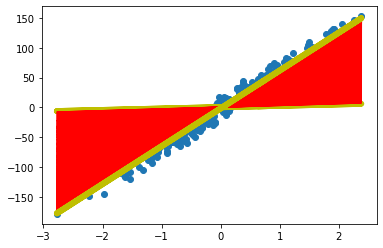

In [31]:
plt.scatter(x, y)
cpt=0
for i in theta_history:
    predictions = model(X, i)
    if(cpt==0):
        plt.plot(x, predictions, c='y',lw=6)
    else:
        plt.plot(x, predictions, c='r')
    cpt=cpt+1
plt.plot(x, predictions, c='y',lw=6)
    


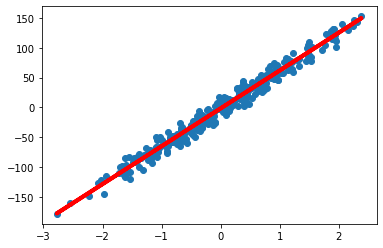

In [32]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r',lw=4)

# 7. Courbes d'apprentissage


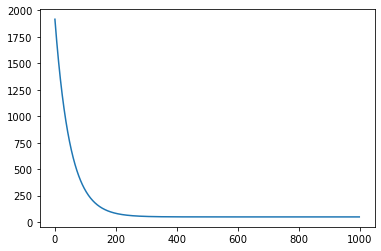

In [33]:
plt.plot(range(n_iterations), loss_history)

# 8. Evaluation finale (Score)
Pour évaluer la réelle performance de notre modele on peut utiliser le **coefficient de détermination**, aussi connu sous le nom $R^2$. Il nous vient de la méthode des moindres carrés. Plus le résultat est proche de 1, meilleur est votre modele

In [34]:
def score(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [35]:
score(y, predictions)

0.9765666325978128

# 9. Application avec ozone.txt

In [36]:
import pandas as pd

In [37]:
df = pd.read_csv('ozone.txt', sep=";", header= 0 , decimal=",")
df

,obs,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent,pluie
0,601,87,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84,Nord,Sec
1,602,82,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87,Nord,Sec
2,603,92,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82,Est,Sec
3,604,114,16.2,19.7,22.5,1,1,0,0.9848,0.3473,-0.1736,92,Nord,Sec
4,605,94,17.4,20.5,20.4,8,8,7,-0.5000,-2.9544,-4.3301,114,Ouest,Sec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,925,84,13.3,17.7,17.8,3,5,6,0.0000,-1.0000,-1.2856,76,Sud,Sec
108,927,77,16.2,20.8,22.1,6,5,5,-0.6946,-2.0000,-1.3681,71,Sud,Pluie
109,928,99,16.9,23.0,22.6,6,4,7,1.5000,0.8682,0.8682,77,Sud,Sec
110,929,83,16.9,19.8,22.1,6,5,3,-4.0000,-3.7588,-4.0000,99,Ouest,Pluie


In [47]:


#df['T12'] = [x.replace(',', '.') for x in df['T12']] # replacer virgule en points pour convertir

x= np.array(df['T12'])
print(x.shape)

x= x.reshape(x.shape[0],1) # redimensioner
print(x.shape)

y= np.array(df['maxO3'])
print(y.shape)

y = y.reshape(y.shape[0],1)
print(y.shape)




(112,)
(112, 1)
(112,)
(112, 1)


In [48]:
np.random.seed(0) #  le meme vecteur theta aléatoire
theta = np.random.randn(2, 1)
print(theta_ozone.shape)

(2, 1)


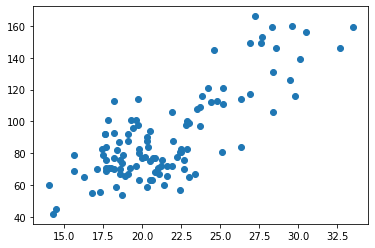

In [49]:
plt.scatter(x,y)
plt.show()

In [50]:
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)

(112, 2)


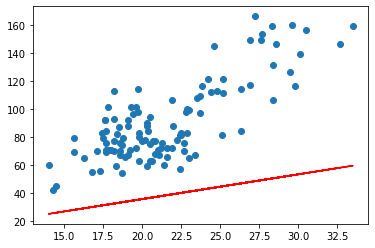

In [51]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')  # pas d'effts il faut entrainer

In [52]:
fonction_cout(X, y, theta)

1610.9942105253353

In [53]:
n_iterations = 1000
learning_rate = 0.0001


theta_final, loss_history,theta_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

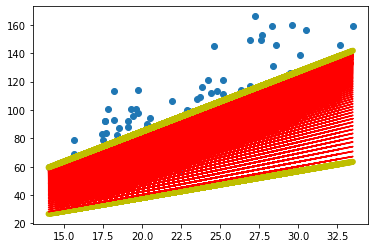

In [116]:
plt.scatter(x, y)
cpt=0
for i in theta_history:
    predictions = model(X, i)
    if(cpt==0):
        plt.plot(x, predictions, c='y',lw=6)
    else:
        plt.plot(x, predictions, c='r')
    cpt=cpt+1
plt.plot(x, predictions, c='y',lw=6)


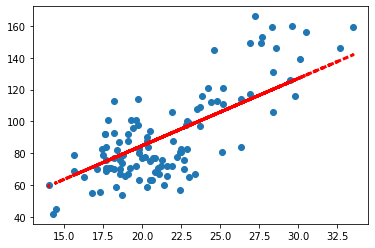

In [54]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r',ls=':',linewidth = '3')

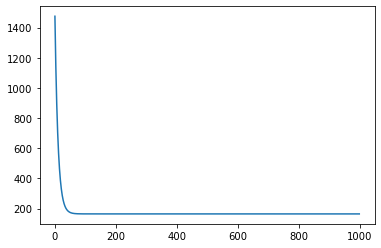

In [110]:
plt.plot(range(n_iterations), loss_history)

In [55]:
score(y, predictions)

0.5818405292584686